 # Chemical Properties of Rivers: Impacts of Mining on Specific Conductance and pH 

This lesson was adapted from educational material written by [Dr. Kateri Salk](https://www.hydroshare.org/user/4912/) for her Fall 2019 Hydrologic Data Analysis course at Duke University. 

## Introduction

The hydrologic impacts on mining can cause cause damage to a landscape in an area much larger than the mining site itself. Water-pollution problems caused by mining include acid mine drainage, metal contamination, and increased sediment levels. The devastating effects of mining impact fisheries, swimming, domestic water supply, irrigation, and other uses of streams. For more information on the environmental impacts of mining, please visit http://www.pollutionissues.com/Li-Na/Mining.html#ixzz6jGlfrX9m

## Learning Objectives 

After successfully completing this exercise, you will be able to:

1. Execute queries to pull a variety of National Water Information System (NWIS) and Water Quality Portal (WQP) data into R.
2. Analyze inorganic aspects of water quality following a watershed disturbance such as mining.

## Requirements to Complete Lesson 

### Packages 
This lesson requires the installation of the following R packages to run the provided script:
- `tidyverse`- Version 1.3.0. A collection of R packages designed for data science. 
- `lubridate`- Version 1.7.9. Functions for working with dates/times. 
- `ggplot2`- Version 3.3.3. Creates elegant data visualisations using the Grammar of Graphics.
- `scales`- Version 1.1.1. Graphical scales provide methods for automatically determining breaks and labels for axes and legends.
- `dataRetrieval`- Version 2.7.6. Retrieval Functions for USGS and EPA Hydrologic and Water Quality Data.
- `cowplot`- Version 1.1.1. Provides various features that help with creating publication-quality figures with 'ggplot2', such as a set of themes, functions to align plots and arrange them into complex compound figures, and functions that make it easy to annotate plots and or mix plots with images.

### Data and Code 

This lesson will import water quality data for two rivers in West Virginia, Twelvepole Creek and Kanawha River, for the entire period of record using the `dataRetrieval` package. The package was created to make querying and downloading hydrologic data from the USGS National Water Information System (NWIS) and the multi-agency database, Water Quality Portal (WQP) easier. NWIS contains streamflow, peak flow, rating curves, groundwater, and water quality data data collected by or for the USGS. WQP only contains water quality data.

It should be noted that the databases are not static as data is constantly being added.  For more in-depth information on the `dataRetrieval` package, please visit https://cran.r-project.org/web/packages/dataRetrieval/vignettes/dataRetrieval.html. 

The code provided in this resource was developed using R version 3.6.1. 

### Set Working Directory 

In R, the working directory is the directory where R starts when looking for any file to open (as directed by a file path) and where it saves any output. This lesson assumes that you have set your working directory to the folder location of the downloaded and unzipped data subsets.

### Load Packages and set ggplot theme

In [179]:
options(warn=-1)

library(tidyverse)
library(lubridate)
library(ggplot2)
library(scales)
library(dataRetrieval)
library(cowplot)

theme_set(theme_gray()) 

## Specific Conductance and pH

**pH** is a measure of the acidity of water. Most natural rivers have pH close to 7 (neutral), but depending on the geology of the watershed they drain, pH can be higher or lower. Most aquatic life has difficulty living in pH less than 6. In areas high in limestone, such as much of the southern Appalachian mountain range, pH tends to be between 7.5 and 8. 

**Specific conductance** is a measure of water's ability to conduct electricity. Because conductivity depends on the number of ions in solution, specific conductance is an inexpensive estimate of how many salts are in solution. Specific conductance is dependant on the total ionic strength of the water, and cannot be directly converted to concentrations of any one ion. In general though, saltier water will have higher specific conductance. Units for specific conductance in freshwater are microsiemens per centimeter at 25 degrees Celsius.

## Import Water Quality Data from the Kanawha River & Twelvepole Creek 

## `readNWISqw`
Use the `readNWISqw` function to import NWIS water quality data. You can access the complete list of NWIS parameter codes here: https://nwis.waterdata.usgs.gov/nwis/pmcodes/. 

In [180]:
data.raw <- readNWISqw(siteNumbers = c("03201300","03206790"), #Kanawha River & Twelvepole Creek
                     parameterCd = c("00095", "00400"), #Specific Conductance & pH
                     startDate = "",
                     endDate = "")

In [181]:
head(data.raw) #view first six lines of data frame

,agency_cd,site_no,sample_dt,sample_tm,sample_end_dt,sample_end_tm,sample_start_time_datum_cd,tm_datum_rlbty_cd,coll_ent_cd,medium_cd,⋯,rpt_lev_va,rpt_lev_cd,lab_std_va,prep_set_no,prep_dt,anl_set_no,anl_dt,result_lab_cm_tx,anl_ent_cd,startDateTime
,<chr>,<chr>,<date>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<dttm>
1,USGS,03206790,1969-09-09,11:00,NA,NA,EDT,T,USGS-WRD,WS,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1969-09-09 11:00:00
2,USGS,03206790,1969-12-09,10:45,NA,NA,EST,T,USGS-WRD,WS,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1969-12-09 10:45:00
3,USGS,03206790,1969-12-09,10:45,NA,NA,EST,T,USGS-WRD,WS,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1969-12-09 10:45:00
4,USGS,03206790,1969-12-31,13:10,NA,NA,EST,T,USGS-WRD,WS,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1969-12-31 13:10:00
5,USGS,03206790,1969-12-31,13:10,NA,NA,EST,T,USGS-WRD,WS,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1969-12-31 13:10:00
6,USGS,03206790,1970-01-20,11:15,NA,NA,EST,T,USGS-WRD,WS,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1970-01-20 11:15:00


In [182]:
str(dat.raw, give.attr = FALSE) #view internal structure of data frame

'data.frame':	1378 obs. of  34 variables:
 $ agency_cd                 : chr  "USGS" "USGS" "USGS" "USGS" ...
 $ site_no                   : chr  "03206790" "03206790" "03206790" "03206790" ...
 $ sample_dt                 : Date, format: "1969-09-09" "1969-12-09" ...
 $ sample_tm                 : chr  "11:00" "10:45" "10:45" "13:10" ...
 $ sample_end_dt             : Date, format: NA NA ...
 $ sample_end_tm             : chr  NA NA NA NA ...
 $ sample_start_time_datum_cd: chr  "EDT" "EST" "EST" "EST" ...
 $ tm_datum_rlbty_cd         : chr  "T" "T" "T" "T" ...
 $ coll_ent_cd               : chr  "USGS-WRD" "USGS-WRD" "USGS-WRD" "USGS-WRD" ...
 $ medium_cd                 : chr  "WS" "WS" "WS" "WS" ...
 $ project_cd                : chr  NA NA NA NA ...
 $ aqfr_cd                   : chr  NA NA NA NA ...
 $ tu_id                     : chr  NA NA NA NA ...
 $ body_part_id              : chr  NA NA NA NA ...
 $ hyd_cond_cd               : chr  "A" "A" "A" "A" ...
 $ samp_type_cd         

## Regroup data frame to put pH and Specific Conductance (SpC) in separate columns, grouped by Date, Parameter, and Site

In [183]:
data <- data.raw %>%
  select(Site = site_no, 
         Date = sample_dt,
         Parameter = parm_cd, 
         Value = result_va) %>%
  group_by(Date, Parameter, Site) %>%
  summarize(Value = mean(Value)) %>%
  spread(key = Parameter, value = Value) %>%
  rename(SpC = '00095', pH = '00400') %>%
  mutate(Site = case_when(Site == "03201300" ~ "Kanawha River",
                          Site == "03206790" ~ "Twelvepole Creek"))

`summarise()` regrouping output by 'Date', 'Parameter' (override with `.groups` argument)



In [184]:
head(data) #only show first six rows of data

Date,Site,SpC,pH
<date>,<chr>,<dbl>,<dbl>
1956-10-01,Kanawha River,250,6.9
1956-10-11,Kanawha River,278,7.0
1956-10-21,Kanawha River,309,7.0
1956-11-01,Kanawha River,162,6.8
1956-11-11,Kanawha River,239,6.9
1956-11-21,Kanawha River,270,6.7


### Filter out data from before 1977

In [185]:
data.early <- data %>%
  filter(Date < "1977-01-01")

head(data.early) #only show first six rows of data

Date,Site,SpC,pH
<date>,<chr>,<dbl>,<dbl>
1956-10-01,Kanawha River,250,6.9
1956-10-11,Kanawha River,278,7.0
1956-10-21,Kanawha River,309,7.0
1956-11-01,Kanawha River,162,6.8
1956-11-11,Kanawha River,239,6.9
1956-11-21,Kanawha River,270,6.7


## Plot the pH of Twelvepole Creek and Kanawha River prior to 1977


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



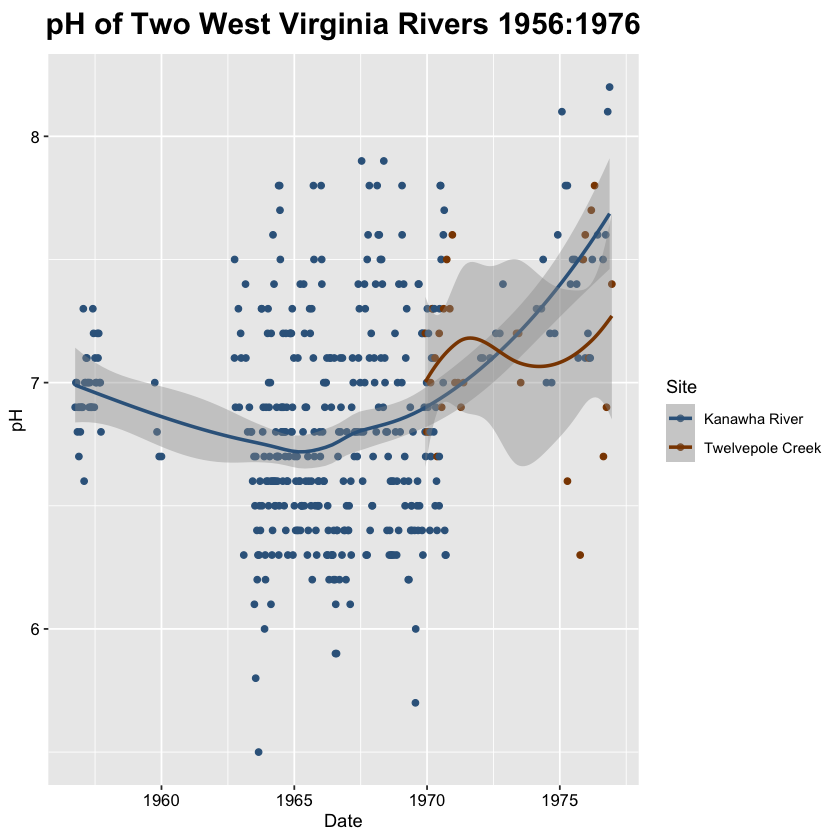

In [186]:
pH.plot <- ggplot(data.early, aes(x = Date, y = pH, color = Site)) +
  geom_point() +
  geom_smooth()+
  scale_color_manual(values = c("steelblue4", "darkorange4")) +
  ggtitle("pH of Two West Virginia Rivers 1956:1976")+
theme(plot.title = element_text(margin = margin(b = 10), size = 18, hjust=0.5, vjust=0.5, face='bold'),axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10)) 

print(pH.plot)

## Plot the Specific Conductance of Twelvepole Creek and Kanawha River prior to 1977

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



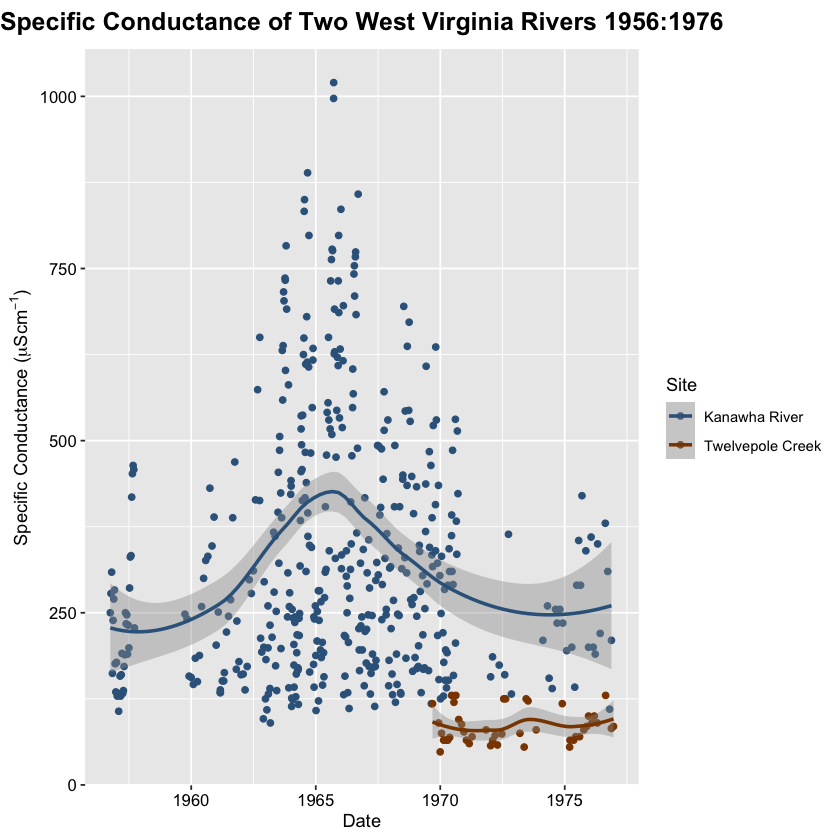

In [187]:
SpC.plot <- ggplot(data.early, aes(x = Date, y = SpC, color = Site)) +
  geom_point() +
  geom_smooth()+
  labs(y = expression("Specific Conductance ("*mu*S * cm**-1*")")) +
  scale_color_manual(values = c("steelblue4", "darkorange4")) +
    ggtitle("Specific Conductance of Two West Virginia Rivers 1956:1976")+
theme(plot.title = element_text(margin = margin(b = 10), size = 15, hjust=0.5, vjust=0.5, face='bold'),axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10)) 


print(SpC.plot)

What differences do you see?
>

Why might mining be causing the changes you see?
>

What is the data frequency of these water quality samples? Why don't we have daily values? How does this inform your interpretation of the data?
>

## What can legislative protections do for water quality?
In 1977 the Surface Mining Control and Reclamation Act (SMCRA) was passed. Take a look at how water quality changed after 1977.

## Plot pH over entire period of record and annotate the graph with a vertical line at 1977

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



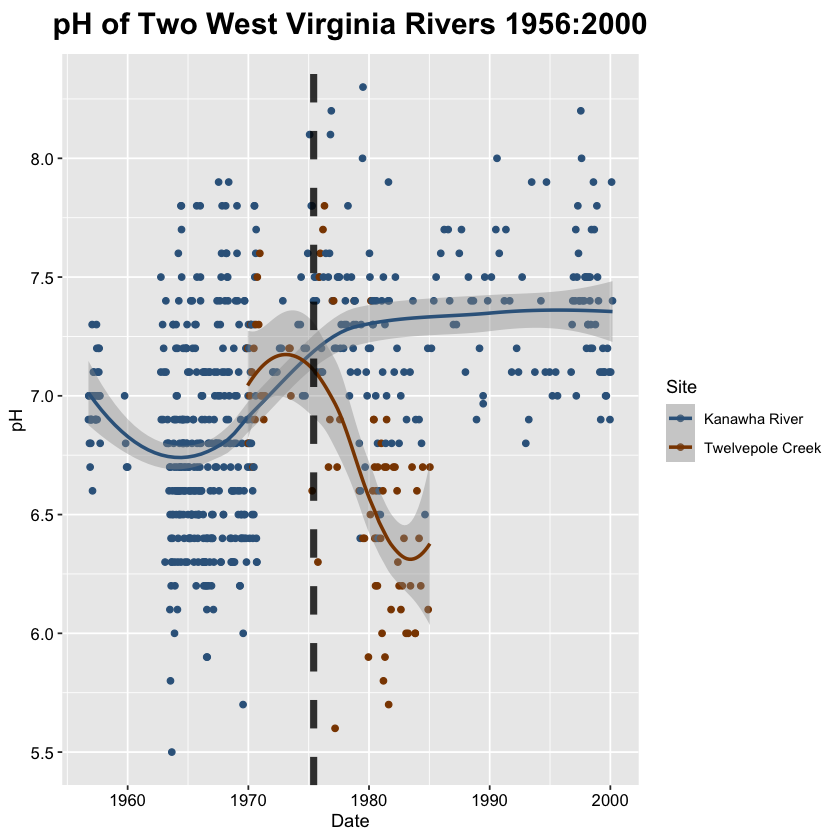

In [188]:
pH.plot.2 <- ggplot(data, aes(x = Date, y = pH, color = Site)) +
  geom_point() +
  geom_smooth() +
  geom_vline(xintercept = 1977, color = "black", alpha = 0.8, lwd = 2, lty = 2) + #add vertical reference line to annotate plot
  scale_color_manual(values = c("steelblue4", "darkorange4")) +
    ggtitle("pH of Two West Virginia Rivers 1956:2000")+
theme(plot.title = element_text(margin = margin(b = 10), size = 18, hjust=0.5, vjust=0.5, face='bold'),axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10)) 


print(pH.plot.2)

## Plot Specific Conductance over entire period of record and annotate the graph with a vertical line at 1977

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



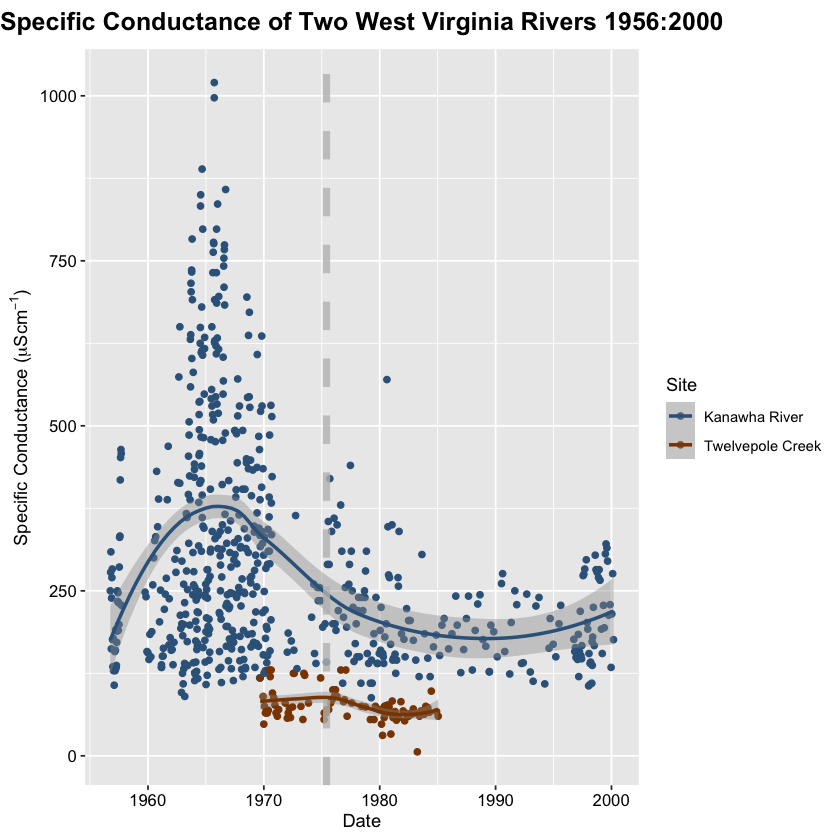

In [189]:
SpC.plot2 <- ggplot(data, aes(x = Date, y = SpC, color = Site)) +
  geom_point() +
  geom_smooth() +
  geom_vline(xintercept = 1977, color = "grey", alpha = 0.8, lwd = 2, lty = 2) + #add vertical reference line to annotate plot
  labs(y = expression("Specific Conductance ("*mu*S * cm**-1*")")) +
  scale_color_manual(values = c("steelblue4", "darkorange4")) +
    ggtitle("Specific Conductance of Two West Virginia Rivers 1956:2000")+
theme(plot.title = element_text(margin = margin(b = 10), size = 15, hjust=0.5, vjust=0.5, face='bold'),axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10)) 


print(SpC.plot2)

What differences are visible in the magnitude of pH and specific conductance over time?
>


## Analyze the yearly average concentrations of pH and SpC in Kanawha River before and after 1977
We will first filter the main data frame for only Kanawha River observations, create a Year column and group all observations by year, summarize the SpC and pH columns by mean, and then create a new column indicating whether the observation was collected before 1977 ("Pre") or after 1977 ("Post"). 

In [190]:
Kanawha.yearly.averages <- data %>%
  filter(Site == "Kanawha River") %>%
  group_by(Year = year(Date)) %>%
  select(-Site, -Date) %>%
  summarize_all(mean) %>%
  mutate(bin = case_when(Year %in% c(1956:1977) ~ "Pre", 
                         Year %in% c(1978:2000) ~ "Post")) 

In [191]:
Kanawha.yearly.averages

Year,SpC,pH,bin
<dbl>,<dbl>,<dbl>,<chr>
1956,233.5556,6.877778,Pre
1957,232.1852,7.011111,Pre
1959,215.6667,6.833333,Pre
1960,267.3333,NA,Pre
1961,218.9375,NA,Pre
1962,275.9412,NA,Pre
1963,383.2125,NA,Pre
1964,NA,6.834426,Pre
1965,NA,6.718750,Pre


## Plot Histogram of yearly average Specific Conductance concentrations 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



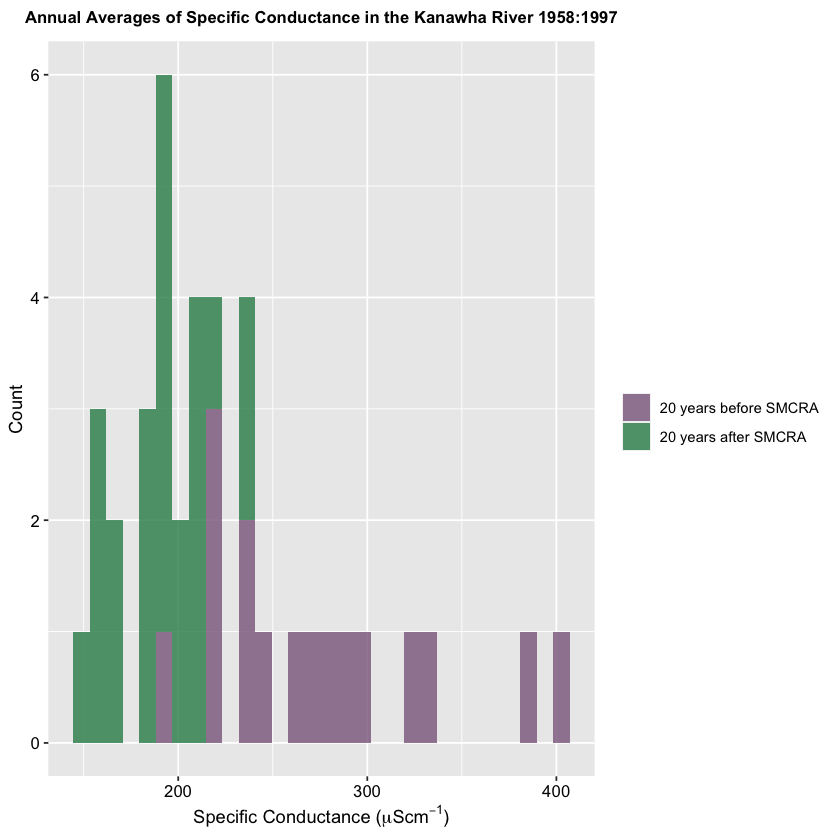

In [192]:
histograms <- ggplot(Kanawha.yearly.averages %>% filter(!is.na(bin)), #remove missing values
       aes(x = SpC, fill = bin)) +
  geom_histogram(alpha = 0.8) +
  ggtitle("Annual Averages of Specific Conductance in the Kanawha River 1958:1997") +
theme(plot.title = element_text(margin = margin(b = 10), size = 10, hjust=0.5, vjust=0.5, face='bold'),axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))+
  labs(x = expression("Specific Conductance ("*mu*S * cm**-1*")"), 
       y = "Count") +
  scale_fill_manual(values = c("plum4", "seagreen4"),
                    name="",
                    breaks=c("Pre", "Post"),
                    labels=c("20 years before SMCRA", "20 years after SMCRA"))

print(histograms)

## Plot Density Estimate of yearly average Specific Conductance concentrations

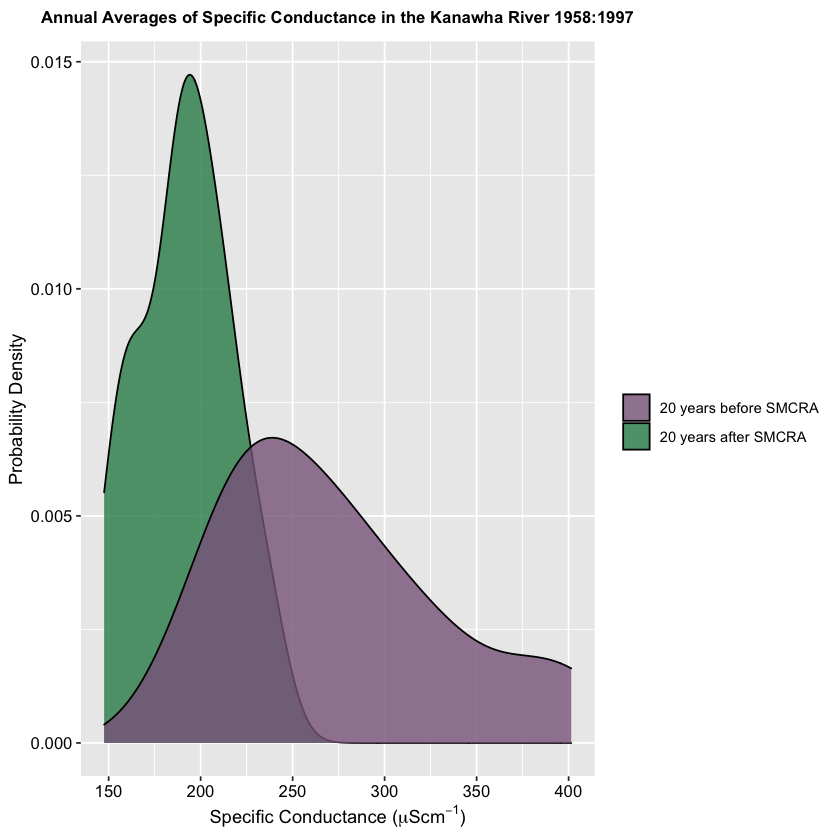

In [193]:
densityplots <- ggplot(Kanawha.yearly.averages %>% filter(!is.na(bin)), 
       aes(x = SpC, fill = bin)) +
  geom_density(alpha = 0.8) +
  ggtitle("Annual Averages of Specific Conductance in the Kanawha River 1958:1997") +
theme(plot.title = element_text(margin = margin(b = 10), size = 10, hjust=0.5, vjust=0.5, face='bold'),axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))+
  labs(x = expression("Specific Conductance ("*mu*S * cm**-1*")"), 
       y = "Probability Density") +
  scale_fill_manual(values = c("plum4", "seagreen4"),
                    name="",
                    breaks=c("Pre", "Post"),
                    labels=c("20 years before SMCRA", "20 years after SMCRA"))

print(densityplots)

How did Specific Conductance change after SMCRA was enacted?
>

## Plot Histogram of yearly average pH concentrations 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



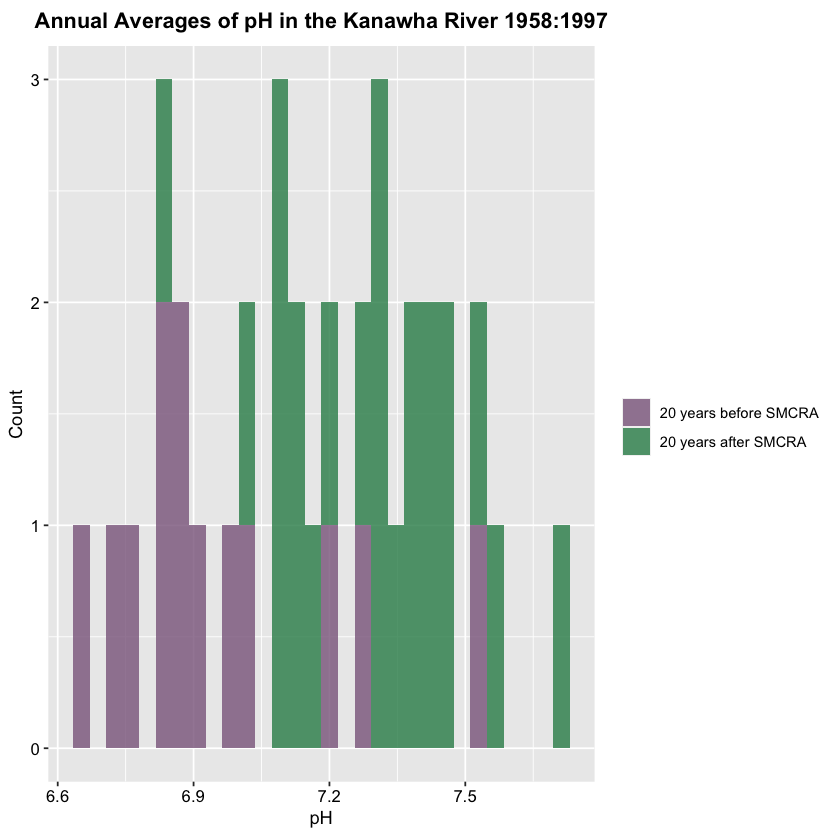

In [194]:
histograms2 <- ggplot(Kanawha.yearly.averages %>% filter(!is.na(bin)), #remove missing values
       aes(x = pH, fill = bin)) +
  geom_histogram(alpha = 0.8) +
  ggtitle("Annual Averages of pH in the Kanawha River 1958:1997") +
theme(plot.title = element_text(margin = margin(b = 10), size = 13, hjust=0.5, vjust=0.5, face='bold'),axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))+
  labs(x = expression("pH"), 
       y = "Count") +
  scale_fill_manual(values = c("plum4", "seagreen4"),
                    name="",
                    breaks=c("Pre", "Post"),
                    labels=c("20 years before SMCRA", "20 years after SMCRA"))

print(histograms2)

## Plot Density Estimate of yearly average pH concentrations

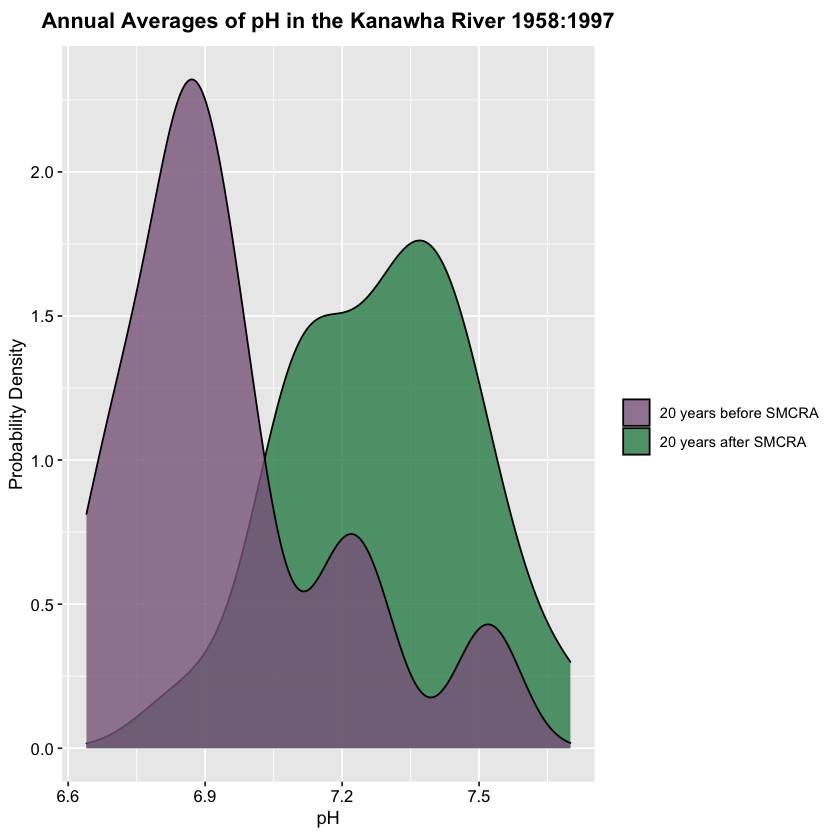

In [195]:
densityplots2 <- ggplot(Kanawha.yearly.averages %>% filter(!is.na(bin)), 
       aes(x = pH, fill = bin)) +
  geom_density(alpha = 0.8) +
  ggtitle("Annual Averages of pH in the Kanawha River 1958:1997") +
theme(plot.title = element_text(margin = margin(b = 10), size = 13, hjust=0.5, vjust=0.5, face='bold'),axis.text.x = element_text(color = "black", size=10), axis.text.y = element_text(color = "black", size=10))+
  labs(x = expression("pH"), 
       y = "Probability Density") +
  scale_fill_manual(values = c("plum4", "seagreen4"),
                    name="",
                    breaks=c("Pre", "Post"),
                    labels=c("20 years before SMCRA", "20 years after SMCRA"))

print(densityplots2)

How did pH change after SMCRA was enacted?
>